# Redes Neurais

## Exemplo de implementação de Rede Neural

Entende-se por *DeepLearning* uma técnica de aprendizado de máquina que ensina o computador a realizar o que humanos fazem por natureza: Aprender por exemplo.

Redes Neurais são o estado da arte no que tange computação cognitiva nos dias atuais e suas aplicações dentro das ciências da computação vão desde carros autônomos aos identificadores de face.

Nós vamos entender como melhor como uma rede neural funciona quando abordado em computação cognitiva, mas para um breve resumo; Temos um conjunto de vetores de entrada, estes vetores tem seu valor original modificado pelas n camadas escondidas do modelo até que seu valor seja transformado em um vetor de saída.

![SVM01](https://cdn-images-1.medium.com/max/1600/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg)

Cada nó desta rede executa a soma de cada peso recebido por seus nós anteriores e tem sua multiplicação propagada por uma função de ativação:

![SVM02](https://github.com/pgiaeinstein/otmz-mlp/raw/master/img/2.jpg)

A estrutura tenta representar o que ocorre em um neurônio quando estimulado:

![SVM03](https://www.codeproject.com/KB/AI/1205732/neuron.png)

![SVM04](https://cdn-images-1.medium.com/max/2000/1*1Jr-Lt9vcEOW2opvZyLbdA.png)

Diferente dos modelos apresentados anteriormente, uma rede neural trabalha melhor com um número maior de features e pode precisar de um número muito maior de entradas de treino para convergir de maneira satisfatória.

In [0]:
from IPython.lib.display import YouTubeVideo

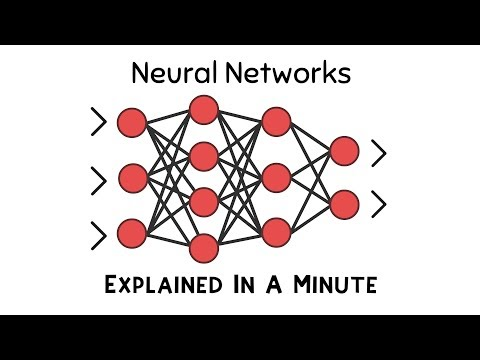

In [0]:
YouTubeVideo('rEDzUT3ymw4', width=720, height=560)

## Gerando uma base de dados para classificação

`make_classification` cria uma amostra randômica para estudos que envolvem classificação.

---

| Parâmetro | Descrição |
|--|--|
| n_samples | O número de amostras |
| n_features | O número de features |
| random_state | A semente utilizada para criar as amostras |


In [0]:
!pip install seaborn

In [0]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_classification, make_regression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [0]:
def plot_history(history):
    plt.figure(figsize = (15, 10))
    plt.plot(history.epoch, np.array(history.history['acc']), label='Train Acc')
    plt.plot(history.epoch, np.array(history.history['val_acc']), label = 'Val Acc')
    plt.title('model accuracy')
    plt.gca().set_ylim(top=1, bottom=0)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    plt.figure(figsize = (15, 10))
    plt.title('model loss')
    plt.gca().set_ylim(top=1, bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history.epoch, np.array(history.history['loss']), label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']), label = 'Val loss')
    plt.legend()
    plt.show()

In [0]:
X, y = make_classification(n_samples=100000)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

## Separando nossa informação em treino / teste

## Padronizando os dados

A padronização realiza a seguinte operação:
    
$$ 
X_i = \frac{X_i \times \overline{X}}{std_X}
$$

Basicamente o que estamos realizando é ignorar a distribuição original da nossa base. Transformaremos os dados para obter uma média muito próxima de 0 e desvio padrão próximo de 1, sendo assim não teremos valores com grande variância na nossa base.

In [0]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

## Tensorflow

O [TensorFlow™](https://www.tensorflow.org/?hl=pt-br) é uma biblioteca de software de código aberto para computação numérica que usa gráficos de fluxo de dados.

[TensorFlow Playground](https://playground.tensorflow.org)

### Sequential()

`Sequential` é a classe que encapsula a lista de camadas que que dará forma ao modelo.

```python
model = Sequential()
model.add(Dense(32, input_shape = (500,)))
model.add(Dense(32))
```


### Dense

`Dense` é a classe que implementa uma camada do modelo.

---

| Parâmetro | Descrição |
|--|--|
| units | Dimensão da camada |
| activation | A função de ativação dos nós |
| input_shape | Dimensão dos inputs da rede |

### tensorflow.keras.models.Sequential.compile

Compila o modelo, geralmente recebe como parâmetro `loss`, `optimizer`, `metrics`.

---

| Parâmetro | Descrição |
|--|--|
| loss | Função considerada para cálculo do erro de saída do modelo |
| optimizer | Função utilizada para otimizar o modelo |
| metrics | Lista de métricas utilizadas para medir o desempenho do modelo durante o treino e teste |

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
def build_model(): # Função para executar as instruções abaixo
    model = keras.Sequential()
    model.add(keras.layers.Dense(20, input_dim=20, activation=tf.nn.relu))
    model.add(keras.layers.Dense(40, activation=tf.nn.relu))
    model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [0]:
model = build_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_25 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 41        
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


- Layer (type) - Retorna nome da camada e tipo
- Output Shape - Retorna dimensão do vetor
- Param # - Retorna a o resultado de $inputs \times nós + bias $

Ex. $20 \times 20 + 20 = 420$

## Como identificar Overfitting e Underfitting?

Overfiting e Underfitting são o caso de resultados ruins em modelos de inteligência artificial.

Podemos classificar como:

- **Underfitting**
 - O modelo tem resultados ruins com a parcela de treino e validação, ou seja, o modelo não é capaz de entregar o resultado esperado por causa de sua arquitetura ou da qualidade da informação que lhe é apresentada.
 

- **Overfitting**
 - O modelo tem resultados excelentes com sua parcela de treinamento, mas é incapaz de reproduzir os mesmos resultados com a parcela de validação.
 
 ![PIC2](https://shapeofdata.files.wordpress.com/2013/02/overfitting.png)

#### Underfitting

- Quando verificamos que o erro da parcela de treino é menor que a de validação e existe uma tendência de queda na parcela de validação, ou seja, esse valor de erro pode melhorar com um número maior de épocas.

 ![PIC3](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/Diagnostic-Line-Plot-Showing-an-Underfit-Model.png)

- Outro exemplo é quando temos um comportamento parecido entre a curva de treino e validação, porém, temos uma variação no erro entre estas curvas. Esse comportamento pode ser causado por um *underfit* da rede e, neste caso, pode ser corrigido modificando a estrutura da rede.


 ![PIC4](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/Diagnostic-Line-Plot-Showing-an-Underfit-Model-via-Status.png)

#### Overfitting

- Quando verificamos que o erro da parcela de treino melhora quanto maior é o número de épocas, porém, a parcela de validação tem um comportamento completamente oposto ou vemos este erro diminuir até um determinado ponto e depois degradar.

 ![PIC3](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/Diagnostic-Line-Plot-Showing-an-Overfit-Model.png)

Podemos combater o *overfit* da rede adicionando uma regularização dos peso do modelo ou uma política de dropout.

#### Regularização de peso

- **L1 regularization**
 - O custo adicionado é proporcional a soma dos valores absolutos dos pesos.

- **L2 regularization**
 - O custo adicionado é proporcional a soma dos valores quadráticos dos pesos.
 
Em poucas palavras, L1 tem o mesmo efeito de reduzir o número de inputs da rede, fazendo com que inputs que tem peso pequeno se aproximem de zero e reduzindo o ruído causado. L2 resulta valores de peso geral menores e estabiliza os pesos quando há alta correlação entre os recursos de entrada.

#### Dropout

Dropout se resume em, aleatoriamente, desligar conexões entre os nós de duas camadas. Diminuindo assim a complexidade da arquitetura da rede.

 ![PIC3](https://cdn-images-1.medium.com/max/800/1*iWQzxhVlvadk6VAJjsgXgg.png)



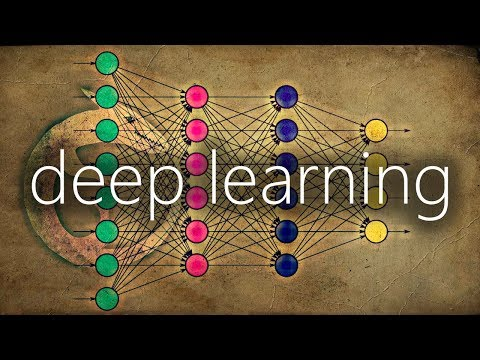

In [0]:
YouTubeVideo('DEMmkFC6IGM', width = 720, height = 560)

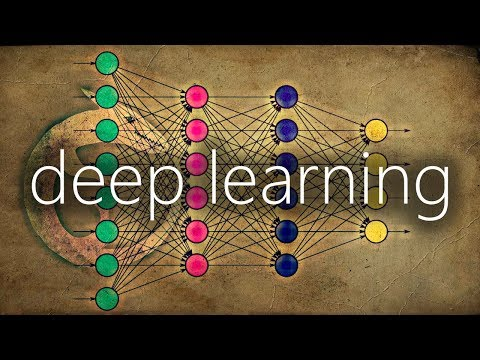

In [0]:
YouTubeVideo('0h8lAm5Ki5g', width = 720, height = 560)

Train on 40000 samples, validate on 10000 samples
Epoch 1/250
40000/40000 [==============================] - 3s 63us/sample - loss: 0.1932 - acc: 0.9268 - val_loss: 0.1540 - val_acc: 0.9424
Epoch 2/250
40000/40000 [==============================] - 2s 59us/sample - loss: 0.1450 - acc: 0.9451 - val_loss: 0.1498 - val_acc: 0.9443
Epoch 3/250
40000/40000 [==============================] - 2s 60us/sample - loss: 0.1418 - acc: 0.9454 - val_loss: 0.1479 - val_acc: 0.9449
Epoch 4/250
40000/40000 [==============================] - 2s 59us/sample - loss: 0.1400 - acc: 0.9465 - val_loss: 0.1489 - val_acc: 0.9436
Epoch 5/250
40000/40000 [==============================] - 2s 59us/sample - loss: 0.1388 - acc: 0.9464 - val_loss: 0.1462 - val_acc: 0.9457
Epoch 6/250
40000/40000 [==============================] - 2s 59us/sample - loss: 0.1380 - acc: 0.9467 - val_loss: 0.1456 - val_acc: 0.9457
Epoch 7/250
40000/40000 [==============================] - 2s 61us/sample - loss: 0.1372 - acc: 0.9469 - val_l

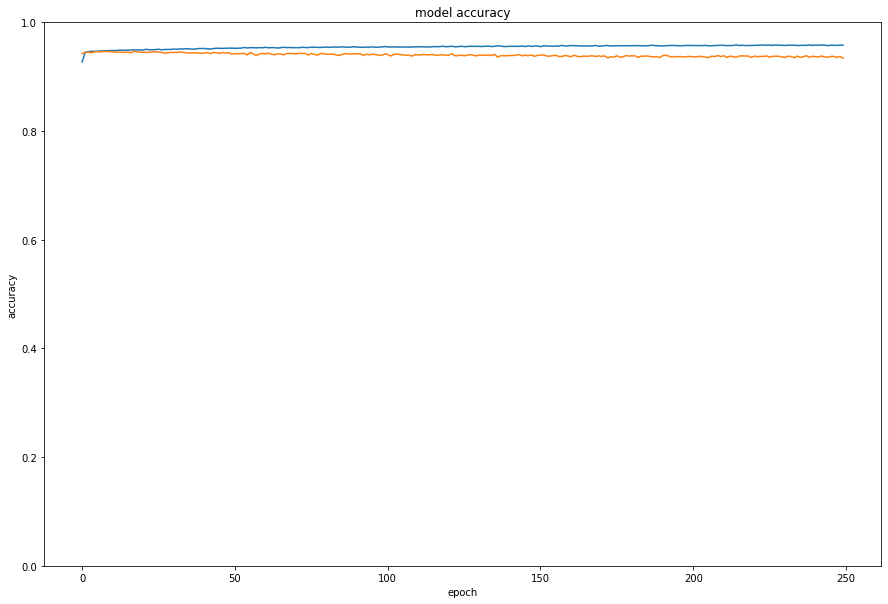

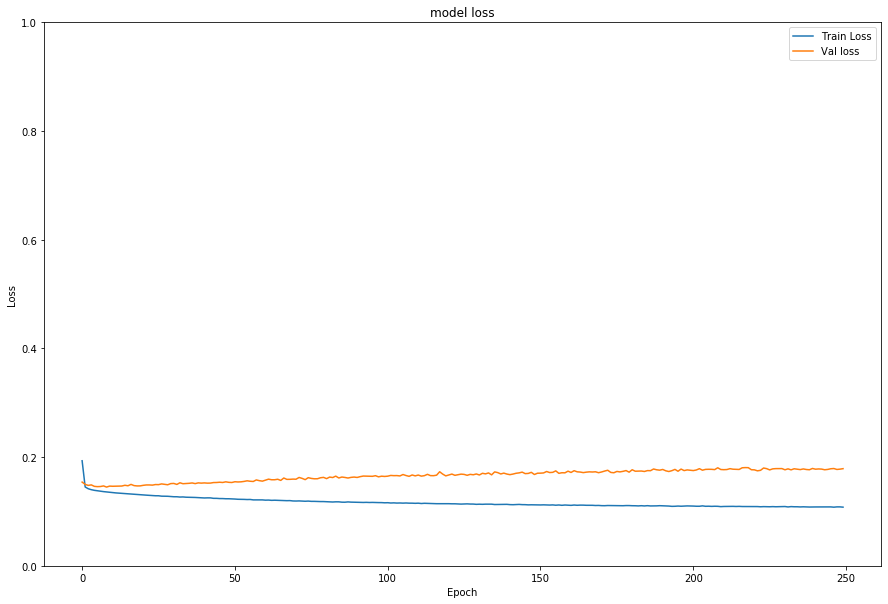

In [0]:
history = model.fit(X_train, y_train, epochs=250, validation_split=0.2, verbose=True)
plot_history(history)

In [0]:
[loss, acc] = model.evaluate(X_test, y_test)
print("Acc: {:.4f}".format(acc))

50000/50000 [==============================] - 1s 26us/sample - loss: 0.1858 - acc: 0.9338
Acc: 0.9338


In [0]:
pred_output = model.predict(X_test)
print(pred_output[:10])
pred_output = (pred_output > 0.5)

[[1.0000000e+00]
 [2.1362954e-01]
 [9.3818915e-01]
 [9.1571510e-02]
 [3.3777952e-04]
 [9.9442315e-01]
 [2.4630725e-03]
 [9.9999666e-01]
 [4.7835708e-03]
 [3.9752424e-03]]


In [0]:
test_preds = model.predict(X_test).flatten()
test_preds_bin = (test_preds > 0.5)
test_preds_bin

array([ True, False,  True, ..., False,  True,  True])

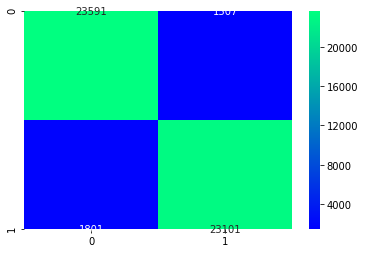

In [0]:
cm  = confusion_matrix(y_test, test_preds_bin)
sns.heatmap(cm, annot = True, fmt='g', cmap = 'winter')

## Curva ROC

A Curva de operação do receptor (*Receiver Operationg Characteristic*)  é uma representação gráfica que ilustra o desempenho (ou performance) de um sistema classificador binário e como o seu limiar de discriminação é variado. [Wikipedia](https://pt.wikipedia.org/wiki/Caracter%C3%ADstica_de_Opera%C3%A7%C3%A3o_do_Receptor)

 ![PIC6](https://ncss-wpengine.netdna-ssl.com/wp-content/uploads/2016/06/ROC-Curves-Empirical-19.png)

#### Sensitivity

Também chamada de *true positive rate*, *recall* ou *probabilidade de detecção*. Mede a proporção de positivos realmente detectados como positivos.

$$
TPR = \frac{TP}{TP + FN}
$$

#### Specificity

Também chamada de *true negative rate*, mede a proporção de negativos realmente detectados como negativos.

$$
TNR = \frac{TN}{TN + FP}
$$

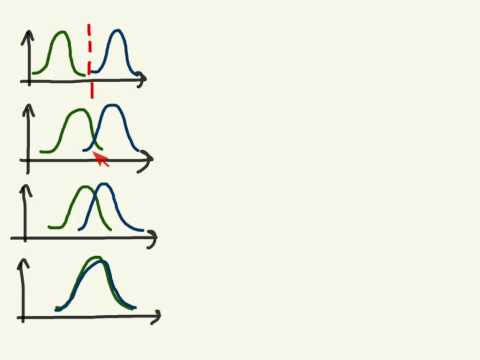

In [0]:
YouTubeVideo('21Igj5Pr6u4', width = 720, height = 560)

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
auc_calc = auc(fpr, tpr)

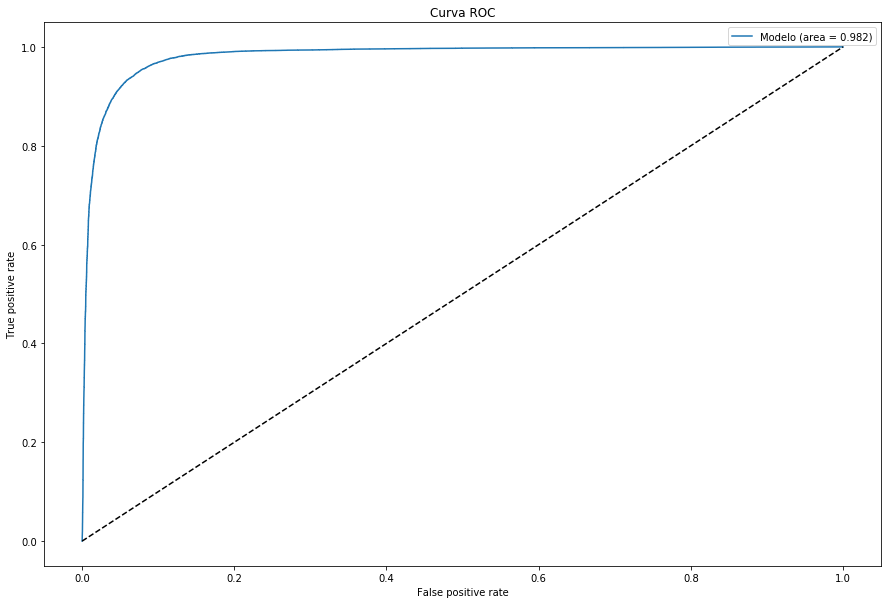

In [0]:
plt.figure(figsize = (15, 10))
plt.plot(fpr, tpr, label='Modelo (area = {:.3f})'.format(auc_calc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.plot([0, 1], [0, 1], 'k--')

## Exercício 1

Dado o problema apresentado na aula passada, tente modelar uma rede para realizar a mesma classificação para o caso de diabetes.

Compare os valores obtidos.

Ao separar as bases em teste e treino, garanta que exatamente 20% seja reservado para a parcela de teste e utilize um random_state igual a 42 como demonstrado abaixo:

```
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
```

### Dados sobre o dataset

#### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [0]:
import pandas as pd

In [0]:
data_diabetes = pd.read_csv('https://raw.githubusercontent.com/pgiaeinstein/otmz-mlp/master/diabetes.csv', sep=',')

In [0]:
data_diabetes.head(10)

,pregnancies,ogtt,dbp,skinthickness,insulin,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [0]:
# Resolução
# data_diabetes.shape

# data_diabetes['class'].value_counts

# data_diabetes.head

# history = model.fit(X_train, y_train, epochs=250, validation_split=0.2, verbose=True)
# plot_history(history)

features = data_diabetes.drop(columns=['class'])
target = data_diabetes['class']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# feature.head(10)

# target.head(10)





